Para classificarmos novos registros, precisamos ter uma base de dados histórica para que o modelo seja treinado em prol de classificar novos registros 

### Introdução ao Algoritmo Naïve Bayes
Cria uma tabela de aprendizagem (probabilidade)

In [1]:
import pandas as pd
import random 
import numpy as np

In [5]:
dataset = pd.read_csv('../Bases de dados/credit_data.csv')
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [7]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


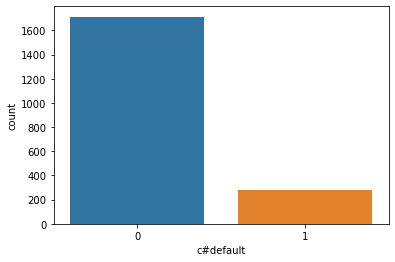

In [8]:
import seaborn as sns # usado para visualização
sns.countplot(dataset['c#default']);
# base de dados está desbalanceada.